In [1]:
# Representing text as data
# 1. Give a simple dataset
# simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [159]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [ ]:
# 2. learn the 'vocabulary' of the training data
# use CountVectorizer() to "convert text into a matrix of token counts":

In [160]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
vector.fit(simple_train)
vector.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [ ]:
# 3. transform training data into a 'document-term matrix' (which is a sparse matrix)
# use “transform()”

In [161]:
simple_train_dtm = vector.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [ ]:
# 4. print the sparse matrix

In [162]:
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [ ]:
# 5. convert the sparse matrix to a dense matrix
# use “toarray()”

In [163]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [ ]:
# 6. examine the vocabulary and document-term matrix together
# use pandas DataFrame and columns by using “get_feature_names()”

In [164]:
import pandas as pd
pd.DataFrame(simple_train_dtm.toarray(), columns=vector.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [ ]:
# 7. transform testing data into a document-term matrix (using existing vocabulary)
# use the test data as:
# simple_test = ["please don't call me"]

In [165]:
simple_test = ["please don't call me"]
simple_test_dtm = vector.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [ ]:
# 8. examine the vocabulary and document-term matrix together

In [166]:
pd.DataFrame(simple_test_dtm.toarray(), columns=vector.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [ ]:
# Reading SMS data
# 9. read tab-separated file “sms.tsv”; give the names of columns as ['label', 'message']; and use head() to view part of the data.

In [167]:
url = r'C:\Users\anjal\Desktop\Validation\sms.tsv'
col_names = ['label', 'message']
sms = pd.read_table(url, sep='\t', header=None, names=col_names)
sms.isnull().any()
sms = sms.fillna(method='ffill')
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# 10. convert label to a numeric variable

In [168]:
sms['label'] = sms.label.map({'ham':0, 'spam':1})

In [ ]:
# 11. define X and y

In [169]:
X = sms.message
y = sms.label

In [ ]:
# 12. split into training and testing sets by train_test_split(); and print the shape of training set and test set.

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [ ]:
# Vectorizing SMS data
# 13. instantiate the vectorizer by CountVectorizer()

In [171]:
vector = CountVectorizer()

In [ ]:
# 14. learn training data vocabulary, then create document-term matrix “X_train_dtm”

In [172]:
vector.fit(X_train)
X_train_dtm = vector.transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [19]:
# 15. transform testing data (using fitted vocabulary) into a document-term matrix

In [173]:
X_test_dtm = vector.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [ ]:
# Building a Naive Bayes model by using Multinomial Naïve Bayes
# 16. train a Naive Bayes model using the matrix “X_train_dtm”

In [174]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [175]:
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
# 17. calculate accuracy of predictions

In [176]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9885139985642498


In [ ]:
# 18. give the confusion matrix

In [177]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1203    5]
 [  11  174]]


In [ ]:
# 19. print message text for the false positives

In [178]:
X_test[y_test < y_pred_class]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [277]:
# 20. print message text for the false negatives

In [179]:
X_test[y_test > y_pred_class]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [ ]:
# Linear Regression (50 points)
# Please use the Linear Regression model from Scikit-Learn to predict housing prices in Boston.
# The Data:
# Load the Boston dataset. This is a dataset that's installed within Scikit-Learn.
# Also refer to “Boston Data Set”:
# https://www.kaggle.com/c/boston-housing
# The Goal: Using Linear Regression on the dataset
# The goal with this exercise: predict the housing price, using other columns (features) in the dataset.
# What to Do
# First, load the Boston housing data with the line below.
# from sklearn.datasets import load_boston
# boston = load_boston()
# Next, separate the data into the features and target using the following code:
# y = boston.target
# boston = pd.DataFrame(boston.data)
# The Tasks:
# Now that the data is in the right format, please plot a correlation matrix to show what features are correlated with each other. For reference, -1 is uncorrelated, and 1 is highly correlated.

In [180]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()
y = boston.target
boston['data']
boston['data'].shape
boston['feature_names']


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [181]:
bostons = pd.DataFrame(boston.data)
bostons.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# 1. First, use boston.corr() to show what features are correlated with each other.

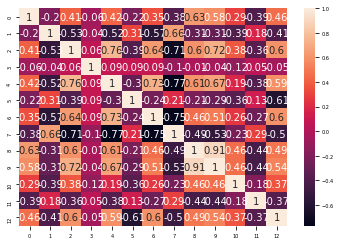

In [182]:
correlation_matrix = bostons.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# 2. The columns don't have any labels. This happens with some datasets. 
# According to the column values shown in https://www.kaggle.com/c/boston-housing, you need to label the columns. Note: only label 13 columns (the website has 14 labels for the columns), 
#         remove the last one of 'medv'. And use boston.corr() again.

In [183]:
# As shown in boston.the shape, the feature names and below, the data has only 13 columns and the column 'medv' is not available to be removed. 
bostons.columns = boston.feature_names
bostons.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


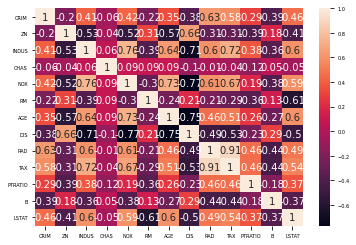

In [184]:
correlation_matrix = bostons.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. 
# Please plot correlations by color according to the following figure and giving the labels of x and y:

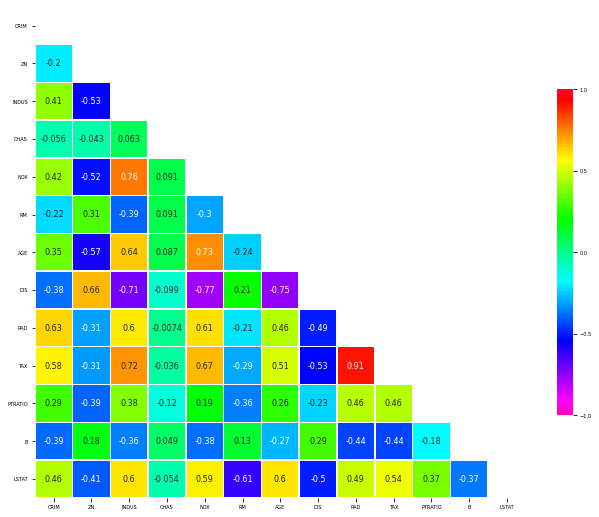

In [185]:
import pandas as pd
import numpy as np
mask = np.zeros_like(bostons.corr())
mask[np.triu_indices_from(mask)] = True
x, y = plt.subplots(figsize=(11, 15))
heatmap = sns.heatmap(bostons.corr(),
                      mask = mask,
                      square = True,
                      linewidths = .5,
                        cmap = 'gist_rainbow_r',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8})

#add the column names as labels
y.set_yticklabels(bostons.corr().columns, rotation = 0)
y.set_xticklabels(bostons.corr().columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [95]:
# Given this output, respond to the following questions:
# 4. In the above plot, what features are highly correlated? Which features are highly uncorrelated?

In [ ]:
The features TAX and RAD are highly correlated with the value of 0.91. The features RAD and CHAS are highly uncorrelated with a value of -0.0074.
The closer the values are to -1 and 1, it is highly correlated. The closer the values are to 0, it is highly uncorrelated.

In [ ]:
# Building the Linear Regression Model
# 5. First, please split the data into two datasets as “training” dataset and “test” dataset by train_test_split(). According to the four steps taught in the classes, please train the model by linear regression.

In [136]:
boston.target.shape

(506,)

In [137]:
bostons['PRICE'] = boston.target
print(bostons.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [138]:
X = bostons.drop('PRICE', axis = 1)
Y = bostons['PRICE']

In [139]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [140]:
regr = LinearRegression()

In [141]:
regr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predict and Score Model
# 6. Then, please predict new values using the test set.

In [142]:
y_pred = regr.predict(X_test)
print(y_pred)

[32.37816533 27.95684437 18.07213891 21.63166556 18.93029508 19.96277202
 32.2834674  18.06715668 24.72989076 26.85359369 27.23326816 28.57021239
 21.18778302 26.94393815 23.37892579 20.89176865 17.11746934 37.73997945
 30.51980066  8.44489436 20.86557977 16.21989418 25.13605925 24.77658813
 31.40497629 11.02741407 13.82097563 16.80208261 35.94637198 14.7155729
 21.23939821 14.15079469 42.72492585 17.83887162 21.84610225 20.40178099
 17.50287927 27.00093206  9.80760408 20.00288662 24.27066782 21.06719021
 29.47089776 16.48482565 19.38852695 14.54778282 39.39838319 18.09810655
 26.22164983 20.60676525 25.09994066 24.48366723 25.02297948 26.84986898
  5.01517985 24.12809513 10.72843392 26.83178157 16.8023533  35.48142073
 19.50937911 27.43260347 16.58016763 19.151488   10.9990262  32.05016535
 36.32672849 21.8596379  24.8158357  25.32934192 23.36795453  6.98356201
 16.83774771 20.27043864 20.74890857 21.85918305 34.17775836 27.94673486
 24.86029952 34.43415796 18.61651831 24.02302532 34.

In [ ]:
# Please give the coefficient for your model.
# 7. The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. What does a positive coefficient and a negative coefficient indicate respectively?

In [143]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-1.14428903e-01  5.71299780e-02  3.83002824e-02  2.42854641e+00
 -2.12326236e+01  2.87723416e+00  6.91118094e-03 -1.47158266e+00
  3.05784197e-01 -1.06750361e-02 -9.96138270e-01  6.27746234e-03
 -5.57414427e-01]


In [144]:
import pandas as pd
df=pd.DataFrame({'featues':X.columns,'coefficient':regr.coef_})
df.sort_values(by=['coefficient'])
df

,featues,coefficient
0,CRIM,-0.114429
1,ZN,0.057130
2,INDUS,0.038300
3,CHAS,2.428546
4,NOX,-21.232624
5,RM,2.877234
6,AGE,0.006911
7,DIS,-1.471583
8,RAD,0.305784
9,TAX,-0.010675


In [ ]:
A positive coefficient indicates that when the independent variable increases, the dependent variable also increases.
A negative coefficient suggests that when the independent variable increases, the dependent variable decreases.

In [ ]:
# Finally, to gain an understanding of how your model is performing, please score the model against three metrics: R squared, mean squared error, and mean absolute error. Write the lines of code to get your output; and answer the questions:
# a) What do these metrics of R Squared, Mean Squared Error, and Mean Absolute Error? What are the numbers telling you?
# b) What you think could improve the model? Try the possible improved model in coding lines as a bonus.

In [145]:
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_pred))

Mean squared error: 21.90


In [146]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: %.2f'
      %mean_absolute_error(Y_test, y_pred))

Mean absolute error: 3.57


In [147]:
print('R Squared: %.2f'
      % r2_score(Y_test, y_pred))

R Squared: 0.78


In [ ]:
The numbers help us to evaluate the model performance and predict error rates.R squared measures the strength of the relationship between the model and the dependent variable on a 0 to 100% scale. 
Mean absolute error is the regression error metric.It represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
Mean Squared Error is the difference between the original and predicted values extracted by squared the average difference over the data set.
R squared represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 taken as percentages. The value is higher, better the model.

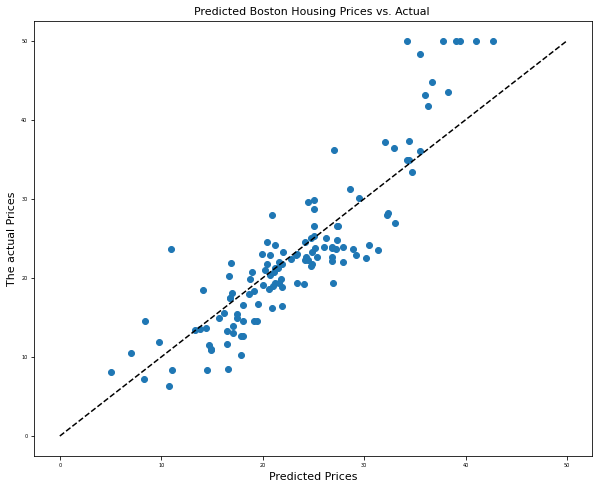

In [148]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred, Y_test)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('The actual Prices', fontsize=11);
plt.xlabel('Predicted Prices', fontsize=11);
plt.title("Predicted Boston Housing Prices vs. Actual ", fontsize=11)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)
plt.show()

In [149]:
# Polynimial Projection

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predicted = poly_model.predict(poly.fit_transform(X_test))
mse_train = mean_squared_error(Y_train, y_train_predicted)
r2_train = r2_score(Y_train, y_train_predicted)

In [157]:
mse_test = mean_squared_error(Y_test, y_test_predicted)
r2_test = r2_score(Y_test, y_test_predicted)
print("The polynomial model performance for the test set")
print("MSE is {}".format(mse_test))
print("R2 score is {}".format(r2_test))

The polynomial model performance for the test set
MSE is 25.34929772557498
R2 score is 0.7440976343028133


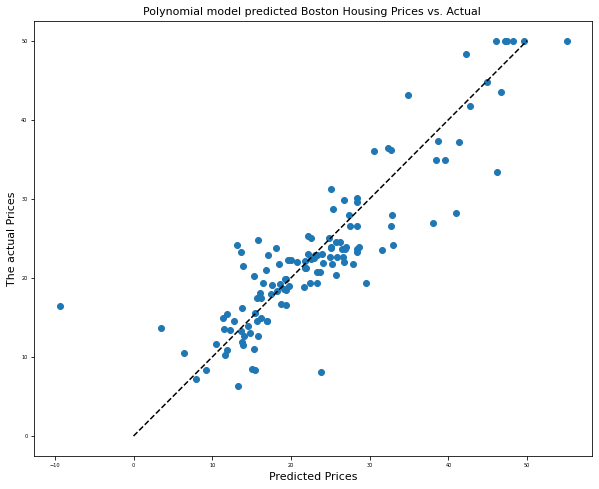

In [151]:
plt.figure(figsize=(10,8))
plt.scatter(y_test_predicted,Y_test)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('The actual Prices', fontsize=11);
plt.xlabel('Predicted Prices', fontsize=11);
plt.title("Polynomial model predicted Boston Housing Prices vs. Actual ", fontsize=11)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)

plt.show()

In [152]:
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()

In [153]:
clf.fit(X_train, Y_train)

GradientBoostingRegressor()

In [154]:
predicted = clf.predict(X_test)
expected = Y_test

In [158]:
from sklearn.metrics import mean_squared_error, r2_score
print('Gradient Boosting Mean squared error: %.2f'% mean_squared_error(Y_test, predicted))
print('Gradient Boosting R Squared score: %.2f' % r2_score(Y_test, predicted))

Gradient Boosting Mean squared error: 7.33
Gradient Boosting R Squared score: 0.93


In [ ]:
Polynomial Projection and Gradient Boosting was used to check for a improved solution. The R squared value
obtained for gradiant boosting is higher than linear regression model and hence it is better.